In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from fredapi import Fred

#M1L4

a. Generate 5 uncorrelated Gaussian random variables that simulate yield changes (they can be positive or negative with a mean close to 0 and a standard deviation that is small).

In [2]:
np.random.seed(1)

mu = 0
std = 0.05

yield_changes = pd.DataFrame(np.random.normal(loc=mu, scale=std, size=(100,5)))

b. Run a Principal Components using EITHER the correlation OR covariance matrix.

In [3]:
yield_changes_means = yield_changes.mean()
yield_changes_stds = yield_changes.std()
standardized_data = (yield_changes - yield_changes_means) / yield_changes_stds
std_data_cov = standardized_data.cov()

eigenvalues, eigenvectors = LA.eig(std_data_cov)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,6))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,1.384668,27.69%
2,1.047263,20.95%
3,0.954461,19.09%
4,0.903765,18.08%
5,0.709842,14.20%


d. Produce a screeplot (see https://en.wikipedia.org/wiki/Scree_plot) of the variance explained for each component.

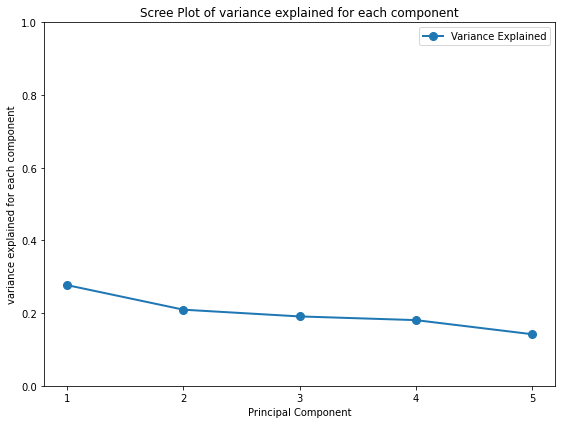

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(df_eigval.index, df_eigval["Explained proportion"], 'o-', markersize=8, linewidth=2, label='Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('variance explained for each component')
plt.title('Scree Plot of variance explained for each component')
plt.xticks(df_eigval.index)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1)
# Display the plot
plt.show()

e&f. Collect the daily closing yields for 5 government securities, say over 6 months

In [5]:
# Using US Govie for different tenor

# Initialize the FRED API with your key
fred = Fred(api_key='5079f41d061a4037d81f3da69e018803') 

# List of Treasury yield series IDs
series_ids = ['DGS1', 'DGS5', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="2025-03-24", observation_end="2025-09-24")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Year', '5 Year', '10 Year', '20 Year', '30 Year']

yield_changes = yields.diff().dropna()

g. Re-run the Principal Components using EITHER the correlation or covariance matrix.

In [6]:
yield_changes_means = yield_changes.mean()
yield_changes_stds = yield_changes.std()
standardized_data = (yield_changes - yield_changes_means) / yield_changes_stds
std_data_cov = standardized_data.cov()

eigenvalues, eigenvectors = LA.eig(std_data_cov)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,6))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,4.093228,81.86%
2,0.765051,15.30%
3,0.114369,2.29%
4,0.014376,0.29%
5,0.012976,0.26%


i. Produce a screeplot of the variance explained for each component.

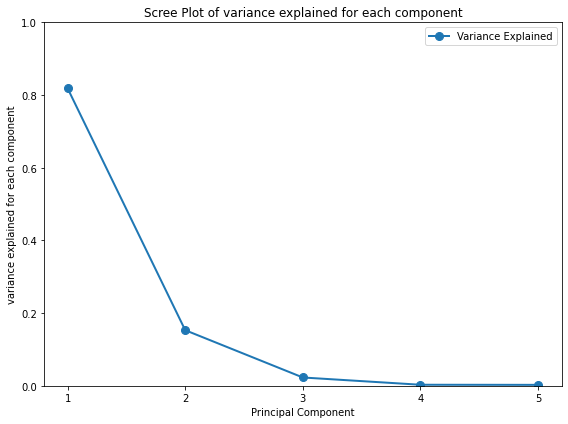

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(df_eigval.index, df_eigval["Explained proportion"], 'o-', markersize=8, linewidth=2, label='Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('variance explained for each component')
plt.title('Scree Plot of variance explained for each component')
plt.xticks(df_eigval.index)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1)
# Display the plot
plt.show()